## Supervised Learning: Logistic Regression on the Profitability of Peer-to-Peer (P2P) Investments 
**Contributor:** Jason Khoo

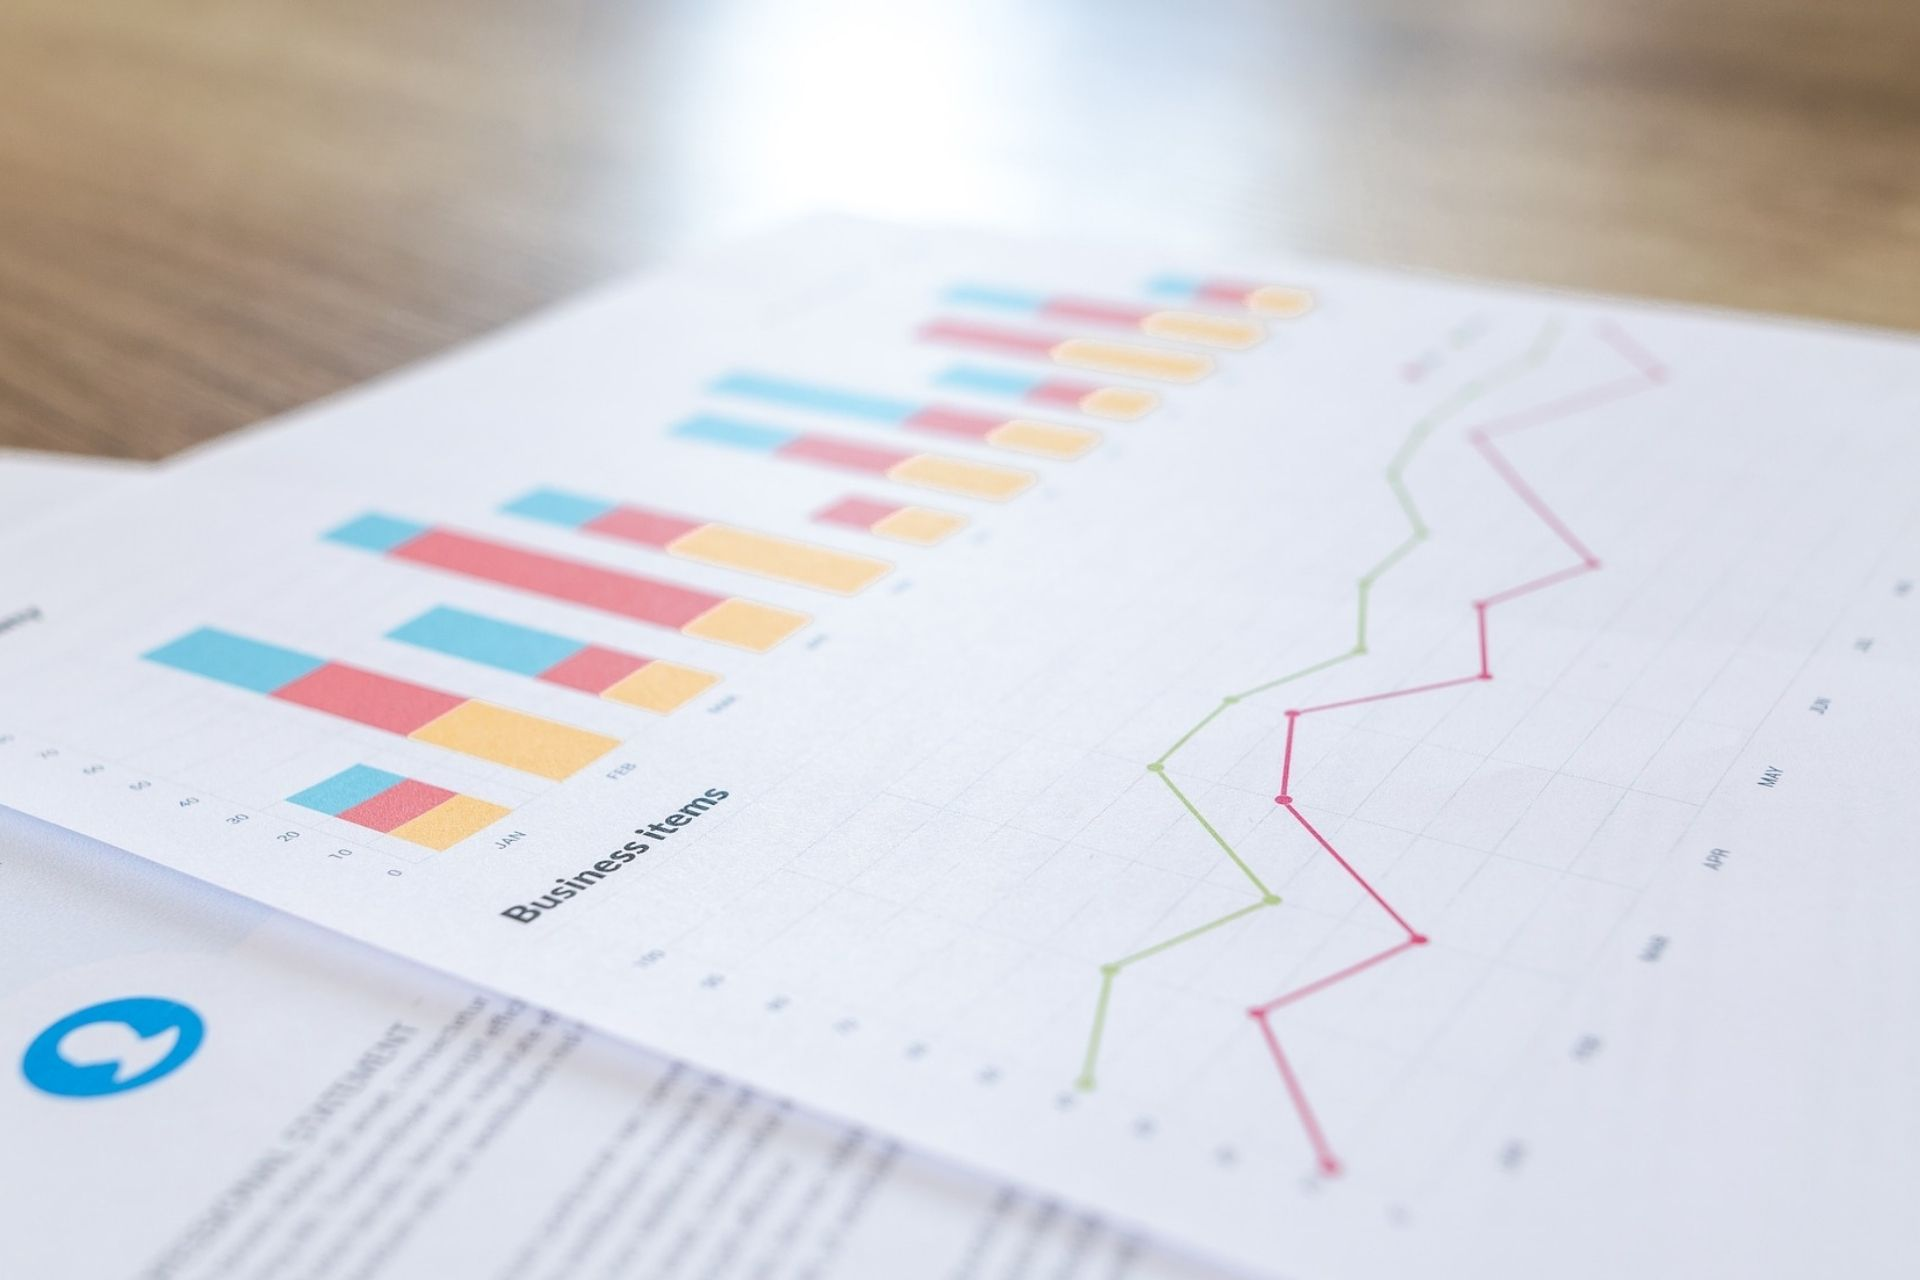

## Introduction 

The principal goal in investing is to maximise profits while maintaining a reasonable degree of risk tolerance. Excess return is usually one of the most useful indicators in investment performance measurement. Excess return is known as the difference in investment returns over a risk-free rate. The risk-free rate is the rate of return that an investor may expect from a risk-free investment (e.g. fixed deposit, AAA-rated government treasury bills / bonds) over a specified time period. 

However, in view that Peer-to-Peer (P2P) investments are generally higher risk, I would be using the S&P 500 average returns as a proxy to measure the profitabilitity of the P2P investments. Based on the statistics of Goldman Sachs, the S&P 500 returned 13.6% annually over the past 10 years. (Source: https://www.spglobal.com/marketintelligence/en/news-insights/latest-news-headlines/s-p-500-returns-to-halve-in-coming-decade-8211-goldman-sachs-59439981).

## Problem Statement 
In this project, I will attempt to **build a logistic regression model to classify the loans into profitable and unprofitable loans**. 

This will **provide a leading indicator to help the P2P platform to identify profitable loan investments to host the loan investments on the platform and to reject any unprofitable loan investment during the onboarding stage**.

## Dataset

#### LendingClub Issued Loans Dataset 

Data source: https://www.kaggle.com/husainsb/lendingclub-issued-loans

The above dataset contains 759,338 loan records with 72 variables over the period from 2016 to 2017 in the United States region. Some variables include (1) interest rate, (2) grade, (3) state, and (4) loan amount.

## Executive Summary

[A. Set Up](#set_up)

[B. Data Wrangling](#wrangling)

[C. Feature Selection](#FS)

[D. Feature Scaling and Imbalanced Dataset Handling](#imbal)

[E. Logistic Regression Model Implementation](#log)

[F. Conclusion](#con)

## A. Set Up <a id = "set_up"></a> 

### i. Import python packages

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### ii. Dataset loading

In [21]:
# load dataset
df = pd.read_csv('dataset/loan_dataset.csv')

# view head
df.head()

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


### iii. Display Columns

In [22]:
#display columns
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_de

### iv. Predictors (Inputs) Selection

In this section, the following potential predictors (inputs) for the return rates are selected:
- Risk Grade (categorical);
- Loan Term (categorical);
- Borrower's State (categorical);
- Annual Income (numerical);
- Loan Amount (numerical); 
- Home Ownership (categorical); and
- Loan Purpose (categorical)

In [23]:
# get interested columns
df=df[['id','grade','term','addr_state',
        'loan_amnt', 'annual_inc','home_ownership','purpose',
        'int_rate']]

# view head
print(df.head())

# view shape
print(df.shape)

          id grade       term addr_state  loan_amnt  annual_inc  \
0  112435993     C  36 months         NY       2300     10000.0   
1  112290210     C  60 months         MA      16000     94000.0   
2  112436985     C  36 months         MA       6025     46350.0   
3  112439006     B  36 months         CA      20400     44000.0   
4  112438929     B  36 months         MN      13000     85000.0   

  home_ownership             purpose  int_rate  
0            OWN         credit_card     12.62  
1       MORTGAGE  debt_consolidation     12.62  
2       MORTGAGE    home_improvement     15.05  
3           RENT                 car      9.44  
4       MORTGAGE  debt_consolidation     11.99  
(759338, 9)


## B. Data Wrangling <a id = "wrangling"></a> 

### i. Check for duplicated loans

In [24]:
# checking for duplicates using id
print("Any duplicated loans (identified by id):")
print(df['id'].duplicated().any())
print(df['id'].duplicated().sum())

Any duplicated loans (identified by id):
False
0


### ii. Check for null interest rate values

In [25]:
# checking for null interest rate values
print("Any null interest rate loans:")
print(df['int_rate'].isnull().any())
print(df['int_rate'].isnull().sum())

Any null interest rate loans:
False
0


### vi. Creation of a binary column for interest rate
- If 'int_rate' >= 13.6, it will be recoded as 1.
- Otherwise, it will be recoded as 0.

In [26]:
df['RecodeIntRate']=df[['int_rate']].apply(
    lambda x: 1 if x['int_rate']>=13.6 else 0,axis=1)

### vii. Recoding of Categorical Data
- Based on the cleaned dataset, we have several categorical variables: 1. grade, 2. term, 3. addr_state, 4. home_ownership and 5. purpose.
- LabelEncoder will be used to encode these variables into numerical form.

In [27]:
# create a copy of categorical columns
df['RecodeGrade'] = df['grade']
df['RecodeTerm'] = df['term']
df['RecodeState'] = df['addr_state']
df['RecodeHomeOwnership'] = df['home_ownership']
df['RecodePurpose'] = df['purpose']

#create a list for the categorical variables
categorical_list = ['RecodeGrade','RecodeTerm','RecodeState',
                    'RecodeHomeOwnership','RecodePurpose']

#encode the categorical variables via a for loop 
for i in categorical_list:
    df[i] = LabelEncoder().fit_transform(df[i])

### viii. Reset Index and Display Cleaned Dataset

In [28]:
#reset row indices 
df = df.reset_index(drop=True)

# view shape
print(df.shape)

# view head
df.head()

(759338, 15)


,id,grade,term,addr_state,loan_amnt,annual_inc,home_ownership,purpose,int_rate,RecodeIntRate,RecodeGrade,RecodeTerm,RecodeState,RecodeHomeOwnership,RecodePurpose
0,112435993,C,36 months,NY,2300,10000.0,OWN,credit_card,12.62,0,2,0,33,3,1
1,112290210,C,60 months,MA,16000,94000.0,MORTGAGE,debt_consolidation,12.62,0,2,1,18,1,2
2,112436985,C,36 months,MA,6025,46350.0,MORTGAGE,home_improvement,15.05,1,2,0,18,1,3
3,112439006,B,36 months,CA,20400,44000.0,RENT,car,9.44,0,1,0,4,4,0
4,112438929,B,36 months,MN,13000,85000.0,MORTGAGE,debt_consolidation,11.99,0,1,0,22,1,2


## C. Feature Selection<a id = "FS"></a> 

### Exploratory Data Analysis and Visualisation 

### i. Feature Selection using Correlation Matrix

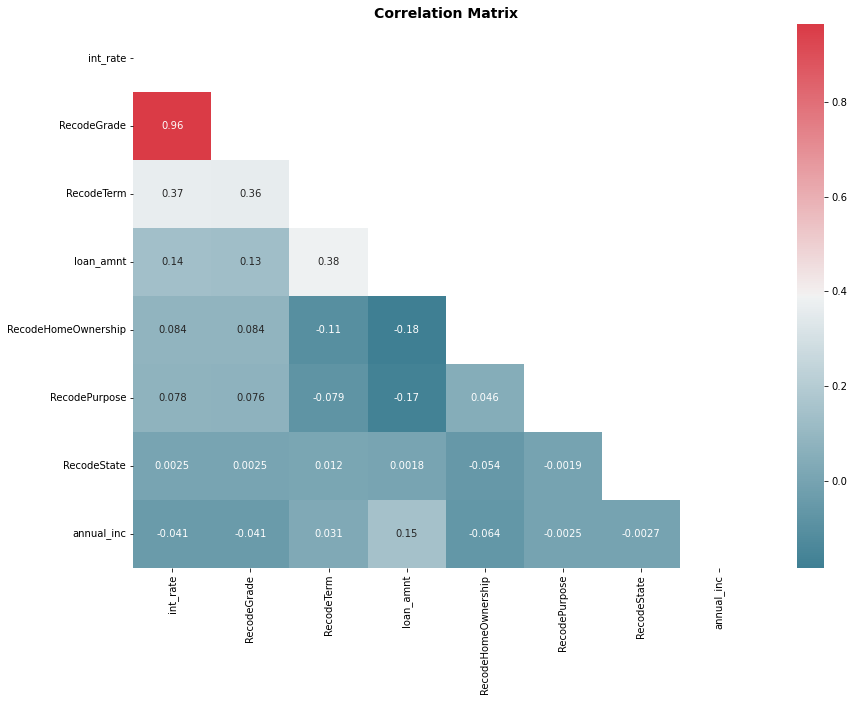

In [29]:
#Select variables to test for correlation
correlation_variables = df[['int_rate','RecodeGrade','RecodeTerm',
                            'RecodeState','RecodeHomeOwnership','RecodePurpose',
                            'loan_amnt','annual_inc']]

corr = correlation_variables.corr()
top_corr_cols = corr["int_rate"].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

#set the figure size for the plot
plt.figure(figsize=(14,10)) 

#Seaborn Heatmap for Correlation
sns.heatmap(top_corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,fmt='.2g',
            mask=dropSelf).set_title('Correlation Matrix',fontweight="bold",fontsize=14)

# show the graph
plt.show()

- From the above correlation matrix, we can see that state has the lowest correlation (i.e. 0.0025) with the interest rate. 
- As such, I shall consider to drop State as a predictor for my model.
- In addition, there is no strong multicollinearity pressence between predictors considered for my model. 

### ii. Bivariate Exploration

- Since State is in consideration of being dropped as a predictor, I will omit them from the bivariate exploration and perform a bivariate exploration for the remaining potential predictors. 

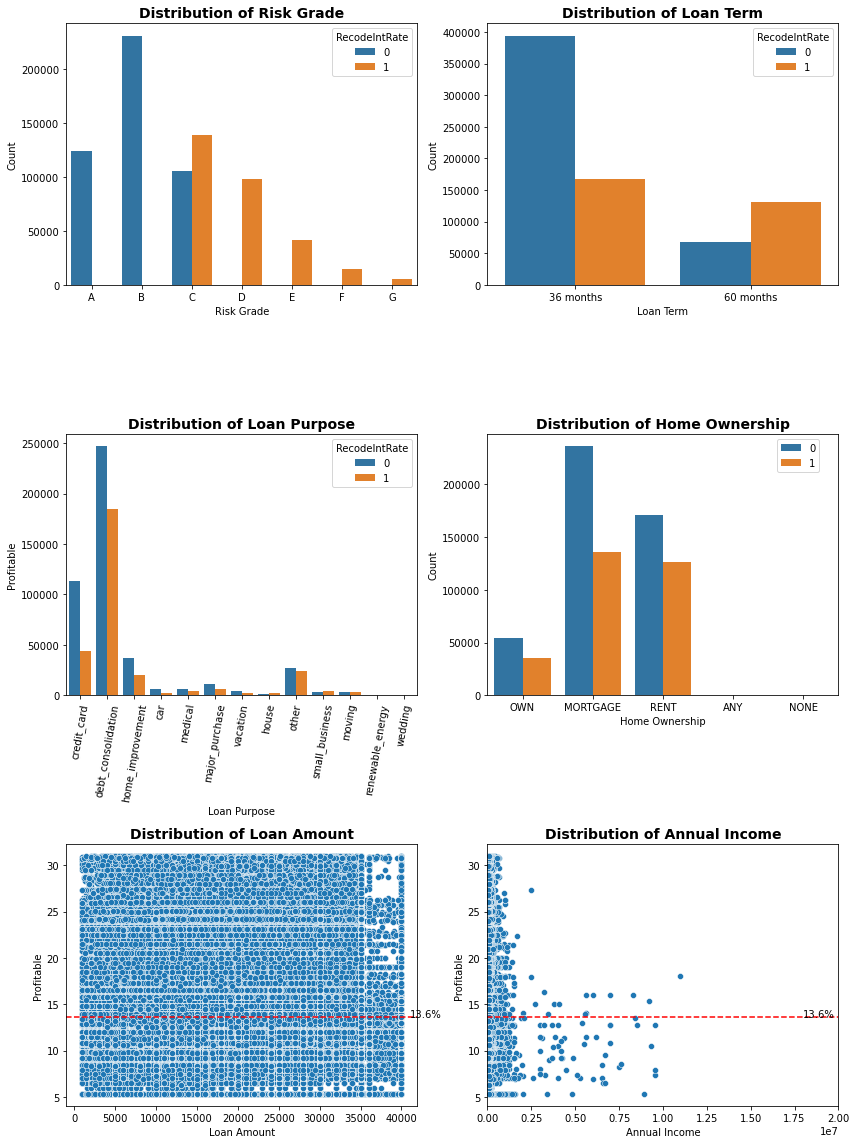

In [55]:
#set the figure size for the plot
plt.figure(figsize=(12,16))

#Subplot for Risk Grade
plt.subplot(3,2,1)
sns.countplot(x='grade',hue='RecodeIntRate', 
              order = ['A','B','C','D','E','F','G'],data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Risk Grade')
plt.ylabel('Count')
plt.title('Distribution of Risk Grade',fontweight="bold",fontsize=14)

#Subplot for Term
plt.subplot(3,2,2)
sns.countplot(x='term',hue='RecodeIntRate',data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Term',fontweight="bold",fontsize=14)

#Subplot for Purpose
plt.subplot(3,2,3)
sns.countplot(x='purpose',hue='RecodeIntRate',data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=80)
plt.xlabel('Loan Purpose')
plt.ylabel('Profitable')
plt.title('Distribution of Loan Purpose',fontweight="bold",fontsize=14)

#Subplot for Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership',hue='RecodeIntRate',data=df)
#shift legend
plt.legend(bbox_to_anchor=(0.96,1))
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontweight="bold",fontsize=14)

#Subplot for Loan Amount
plt.subplot(3,2,5)
sns.scatterplot(x='loan_amnt',y='int_rate',data=df)
#reference line for 13.6%
plt.axhline(13.6, c='r',linestyle='--')
#annotation for reference line 
plt.annotate('13.6%',(41000,13.6))
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Loan Amount')
plt.ylabel('Profitable')
plt.title('Distribution of Loan Amount',fontweight="bold",fontsize=14)

#Subplot for Annnual Income
plt.subplot(3,2,6)
sns.scatterplot(x='annual_inc',y='int_rate',data=df)
#reference line for 13.6%
plt.axhline(13.6, c='r',linestyle='--')
#annotation for reference line 
plt.annotate('13.6%',(18000000,13.6))
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Annual Income')
plt.ylabel('Profitable')
plt.xlim(0,20000000)
plt.title('Distribution of Annual Income',fontweight="bold",fontsize=14)

#Auto adjust padding between subplots
plt.tight_layout()

plt.show()

- It is difficult to see if there is any relationship between both the Loan Amount and Annual Income with the Interest Rate. I will hold in dropping them as predictors in the mean time. 
- In view that it is difficult to observe any trends for the Risk Grade, Loan Term, Loan Purpose and Home Ownership using a count plot, I shall use a percentage stacked bar chart to explore further. 

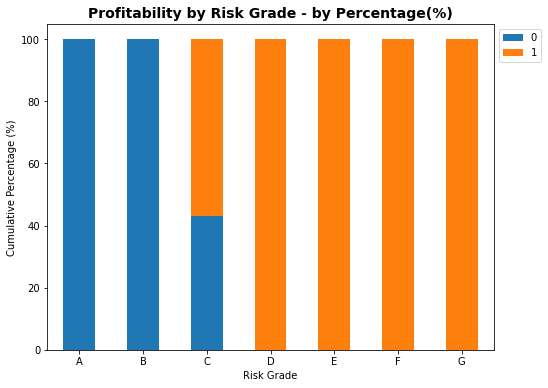

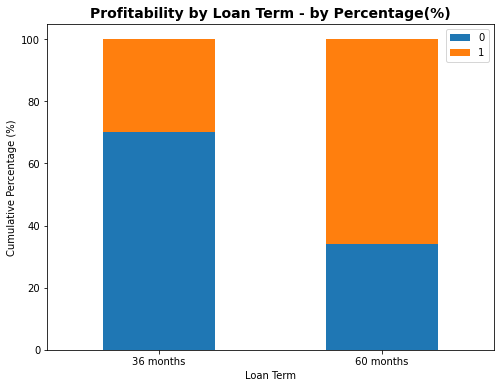

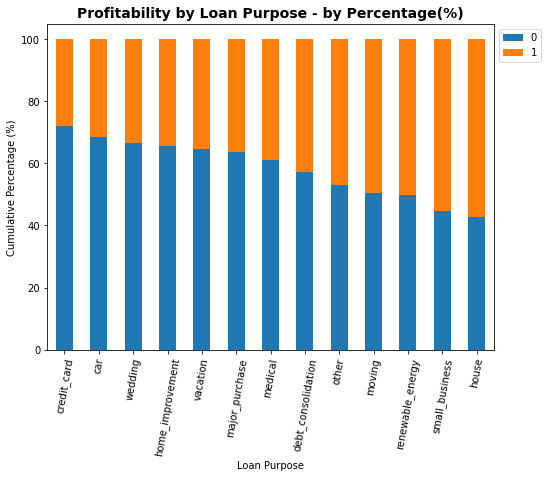

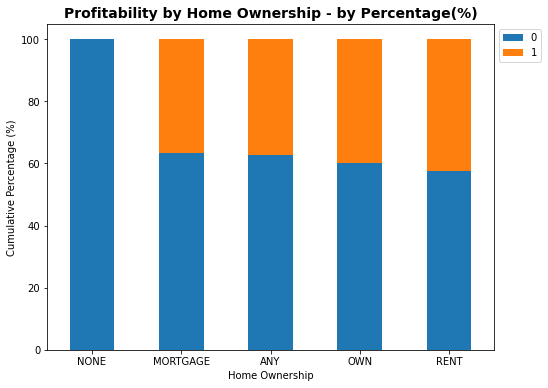

In [91]:
#Risk Grade
loan_grade_grouped = df.groupby(['grade','RecodeIntRate'])['grade'].count().unstack('RecodeIntRate')
loan_grade_grouped2 = loan_grade_grouped.div(loan_grade_grouped.sum(axis=1),axis=0)*100
loan_grade_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Risk Grade')
plt.xticks(rotation=0)
plt.title('Profitability by Risk Grade - by Percentage(%)',fontweight="bold",fontsize=14)


#Loan Term
loan_term_grouped = df.groupby(['term','RecodeIntRate'])['term'].count().unstack('RecodeIntRate')
loan_term_grouped2 = loan_term_grouped.div(loan_term_grouped.sum(axis=1),axis=0)*100
loan_term_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Loan Term')
plt.xticks(rotation=0)
plt.title('Profitability by Loan Term - by Percentage(%)',fontweight="bold",fontsize=14)


#Loan Purpose
loan_purpose_grouped = df.groupby(['purpose','RecodeIntRate'])['purpose'].count().unstack('RecodeIntRate')
loan_purpose_grouped2 = loan_purpose_grouped.div(loan_purpose_grouped.sum(axis=1),axis=0)*100
#sort by profitable loans
loan_purpose_grouped2 = loan_purpose_grouped2.sort_values([1])
loan_purpose_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=80)
plt.title('Profitability by Loan Purpose - by Percentage(%)',fontweight="bold",fontsize=14)


#Home Ownership
home_own_grouped = df.groupby(['home_ownership','RecodeIntRate'])['home_ownership'].count().unstack('RecodeIntRate')
home_own_grouped2 = home_own_grouped.div(home_own_grouped.sum(axis=1),axis=0)*100
#sort by profitable loans
home_own_grouped2 = home_own_grouped2.sort_values([0],ascending=False)
home_own_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Home Ownership')
plt.xticks(rotation=0)
plt.title('Profitability by Home Ownership - by Percentage(%)',fontweight="bold",fontsize=14)


# show the graph
plt.show()


- Based on the above charts, there is an observable trend for Risk Rating, Loan Term, Loan Purpose and Home Ownership. 
- Risk Grade: As risk grades deteriorate, there are more profitable loans.
- Loan Term: There are more profitable loans for 60 months loans.
- Loan Purpose: Certain loan purposes tend to have a better loan profitability (e.g. house / small business).
- Home Ownership: The pressence of home ownership improves the profitability of loan. 

### Statistical Validation 

### iii. Chi-Square Test of Independence

> #### H0: Interested predictor is independent of Estimated Return
> #### H1: Interested predictor is not independent of Estimated Return
*(Assuming significance level is set at 5%)*

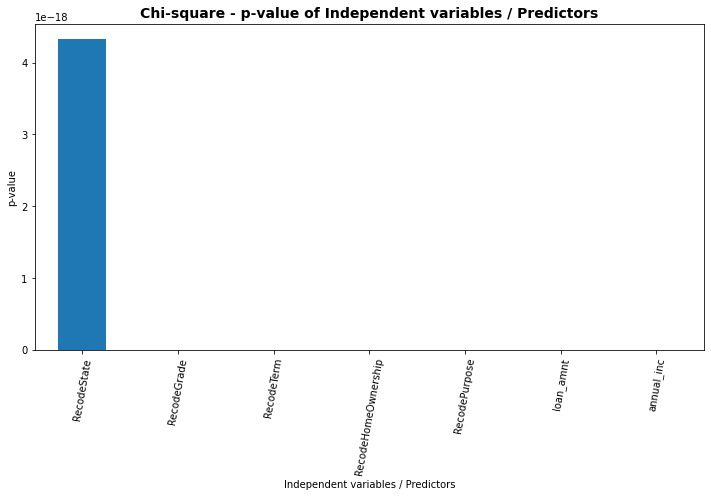

In [90]:
from sklearn.feature_selection import chi2

# define the independent and dependent variables for chi2 testing
chi2_x = df[['RecodeGrade','RecodeTerm','RecodeState','RecodeHomeOwnership','RecodePurpose','loan_amnt','annual_inc']]
chi2_y = df[['RecodeIntRate']]

# calculate chi2 scores - 1st array would be chi square values while 2nd array is the p-values
chi2_scores = chi2(chi2_x,chi2_y)

# take only the p-value for comparison
p_value = pd.Series(chi2_scores[1],index=chi2_x.columns)

# sort p-values by descending
p_value.sort_values(ascending=False, inplace=True)

#set the figure size for the plot
plt.figure(figsize=(12,6))

#plot bar
p_value.plot.bar()

#x-axis, y-axis and title adjustment and labelling
plt.ylabel('p-value')
plt.xlabel('Independent variables / Predictors')
plt.xticks(rotation=80)
plt.title('Chi-square - p-value of Independent variables / Predictors',fontweight="bold",fontsize=14)

# show the graph
plt.show()

Based on the above visualisation of the p-values:
- the p-values of the all variables is < significance level (0.05), we reject H0 and conclude that they are not independent (i.e. related) of interest rate. 

### iv. Conclusion

- State is identified via both the correlation matrix, as such, I will drop State as a predictor.
- Based on the chi-square analysis, the predictors selected seemed suitable for the model in view that they are affects the interest rate. 

Based on the above, only the following variables will be selected for the modelling:
- Risk Grade;
- Loan Term;
- Home Ownership; 
- Loan Purpose
- Loan Amount; and
- Borrowers' Annual Income.

## D. Feature Scaling and Imbalanced Dataset Handling <a id = "imbal"></a> 

In [92]:
#get the data for Modelling and restructure it such that y at the last column
df_model = df[['RecodeGrade','RecodeTerm','RecodeState',
               'RecodeHomeOwnership','RecodePurpose',
               'loan_amnt','annual_inc', 'RecodeIntRate']]

df_model

,RecodeGrade,RecodeTerm,RecodeState,RecodeHomeOwnership,RecodePurpose,loan_amnt,annual_inc,RecodeIntRate
0,2,0,33,3,1,2300,10000.0,0
1,2,1,18,1,2,16000,94000.0,0
2,2,0,18,1,3,6025,46350.0,1
3,1,0,4,4,0,20400,44000.0,0
4,1,0,22,1,2,13000,85000.0,0
...,...,...,...,...,...,...,...,...
759333,0,0,34,3,1,6000,38000.0,0
759334,1,0,13,4,2,6000,32640.0,0
759335,2,1,47,4,1,14400,47000.0,0
759336,3,0,19,1,1,34050,87800.0,1


### i. Feature Scaling via Normalisation

In [93]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

# define X for independent variables and y for dependent variable 
X = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]

# perform normalisation
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()

,RecodeGrade,RecodeTerm,RecodeState,RecodeHomeOwnership,RecodePurpose,loan_amnt,annual_inc
0,0.333333,0.0,0.673469,0.75,0.083333,0.033333,0.000091
1,0.333333,1.0,0.367347,0.25,0.166667,0.384615,0.000855
2,0.333333,0.0,0.367347,0.25,0.250000,0.128846,0.000421
3,0.166667,0.0,0.081633,1.00,0.000000,0.497436,0.000400
4,0.166667,0.0,0.448980,0.25,0.166667,0.307692,0.000773


- Normalisation can help to improve convergence speed and accuracy of logistic regression model. 
- The use of MinMaxScaler was used to implement normalisation. 
- As seen from the results, the normalisation has scaled the data to lie between 0 and 1. 

### ii. Count plot on the interest rate (i.e. profitability)

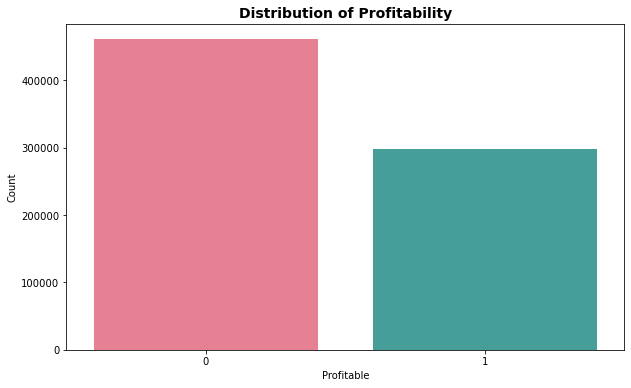

In [100]:
#set the figure size for the plot
plt.figure(figsize=(10,6))

# countplot of the 1s and 0s
sns.countplot(x='RecodeIntRate',data=df_model,palette='husl')

#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Profitable')
plt.ylabel('Count')
plt.title('Distribution of Profitability',fontweight="bold",fontsize=14)

plt.show()

- Based on the above, it appears that there is slight class imbalances as the profitable loans are under represented. 
- As such, I shall perform a Synthetic Minority Over-sampling Technique (SMOTE) to increase the minority (i.e. profitable loans) data.

### iii. Performing SMOTE to handle imbalanced dataset

In [99]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# conda install -c conda-forge imbalanced-learn


# Split train-test data (70%-30% split)
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.30)

# summarize class distribution for 1 and 0
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 322708, 1: 208828})
After oversampling:  Counter({0: 322708, 1: 322708})


In [104]:
y_train_SMOTE

0         0
1         1
2         0
3         1
4         0
         ..
645411    1
645412    1
645413    1
645414    1
645415    1
Name: RecodeIntRate, Length: 645416, dtype: int64

- As observed, after performing SMOTE, the minority class (i.e. profitable loans) has comparable data size (50%-50% proportion) as the majority class (i.e. unprofitable loans).

## E. Logistic Regression Model Implementation <a id = "log"></a>

### i. Logit Function - Wald Test

In [105]:
from statsmodels.discrete.discrete_model import Logit

logit_model=Logit(y_train_SMOTE, X_train_SMOTE)
logit = logit_model.fit()
print(logit.summary2())

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.353457
         Iterations 9
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.490      
Dependent Variable:     RecodeIntRate        AIC:                  456267.8643
Date:                   2021-12-01 17:49     BIC:                  456347.5079
No. Observations:       645416               Log-Likelihood:       -2.2813e+05
Df Model:               6                    LL-Null:              -4.4737e+05
Df Residuals:           645409               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         9.0000                                                
------------------------------------------------------------------------------
                      Coef.    Std.Err.     z     P>|z|    [0.025     0.975]  
-------------------------------------------------------------

- Using the logit function, we can validate our choices of predictors in the feature selection.

**H0: Predictor is not statistical significant </br>
H1: Predictor is statistical significant** 

- Based on the summary, the p-value (i.e. P>|z|) for all parameters is below the significance level of 5%, this represents that the null hypothesis can be rejected and the predictor is considered statistically significant (i.e. a suitable predictor for the model). 

### ii. Logistic Regression Function

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

#make an instance of the model
LogisticReg = LogisticRegression(solver='liblinear')

#train the model on the data
LogisticReg.fit(X_train_SMOTE, y_train_SMOTE)

#define function for print score - metrics
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


#print score
print_score(LogisticReg, X_train_SMOTE, y_train_SMOTE, X_test, y_test, train=False)

Test Result:
Accuracy Score: 86.14%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       1.000000      0.738777   0.86138       0.869388       0.897591
recall          0.771992      1.000000   0.86138       0.885996       0.861380
f1-score        0.871327      0.849766   0.86138       0.860546       0.862874
support    138495.000000  89307.000000   0.86138  227802.000000  227802.000000
_______________________________________________
Confusion Matrix: 
 [[106917  31578]
 [     0  89307]]



### Model Evaluation

> #### Confusion Matrix

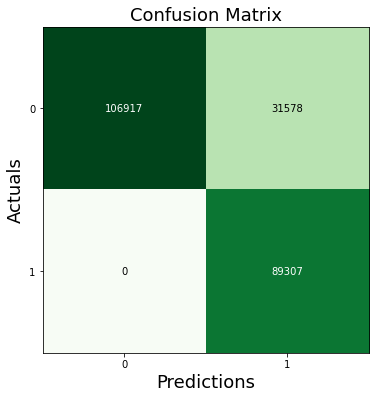

Accuracy: 0.8613796191429399
Precision: 0.738776523141829
Recall: 1.0


In [107]:
from mlxtend.plotting import plot_confusion_matrix
# conda install mlxtend --channel conda-forge

predictions = LogisticReg.predict(X_test)
cm = confusion_matrix(y_test,predictions)

plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# model metrics
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Based on the above: 
- the accuracy score of this model is 86%, which is considered as a good accuracy.  
- the precision score is 74%, this tells us when the logistic regression model predicted a loan is profitable, the loan is 74% profitable of the time. 
- the recall score is 100%, this tells us that if the loan is profitable in the test set, the logistic regression model can identify it 100% of the time. 
- the logistic regression model appears to be better at predicting results when the loan is actually profitable (89307/(89307+0) = 100%) as compared to when the loan is actually unprofitable (106917/(106917+31578) = 77%).

> #### ROC Curve

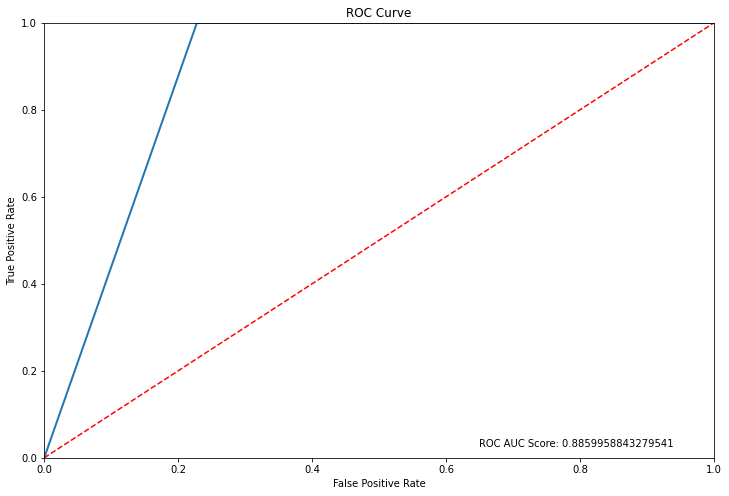

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

# roc curve plot
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "r--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # roc auc score
    plt.annotate('ROC AUC Score: {}'.format(roc_auc_score(y_test, LogisticReg.predict(X_test))),(0.65,0.025))


fpr, tpr, thresholds = roc_curve(y_test, LogisticReg.predict(X_test))
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

- The ROC AUC Score is 0.8860, which is relatively good. A high AUC score (i.e. close to 1) represents a good classifier. 

## F. Conclusion  <a id = "con"></a> 

### Conclusion
- The logistic regression model produced above is a good model given that the model’s accuracy score and ROC AUC score is high.
- The model could be used for predicting profitability of future loans given the loan’s attributes. 
- The P2P platform could use the model to provide leading indication of unprofitable loans and not onboard such unprofitable loans to protect the investors on their platform. 

### Limitations
- One of the main assumption in logistic regression is linearity where the predictors must have a linear relationship with the logit (or log odds) of the dependent variable (i.e. return rates). This assumption is yet to be validated through a visual or any statistical test.

### Future Research
- The linearity of the logic of return rates and the predictors could be validated via statistical test (e.g. Box-Tidwell Test) or visualisation (e.g. scatter plot between each predictor and the logit values).
- Other underlying assumptions under the logistic regression should be further validated and tested as well to strengthen the reliability of the model. 